In [19]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_01.csv')
df2 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_02.csv')
df3 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_03.csv')
baseline_df = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix.csv')

# Function to calculate average fixation duration
def calculate_average_fixation_duration(df):
    df['fixation_start'] = df['fixation'].diff().fillna(0) == 1
    df['fixation_end'] = df['fixation'].diff().fillna(0) == -1

    fixation_starts = df[df['fixation_start']].index
    fixation_ends = df[df['fixation_end']].index

    # Ensure every fixation end has a corresponding start
    if len(fixation_starts) > len(fixation_ends):
        fixation_starts = fixation_starts[:len(fixation_ends)]
    elif len(fixation_ends) > len(fixation_starts):
        fixation_ends = fixation_ends[:len(fixation_starts)]

    # Calculate fixation durations
    fixation_durations = df.loc[fixation_ends, 'reltime'].values - df.loc[fixation_starts, 'reltime'].values
    fixation_durations = fixation_durations[~pd.isnull(fixation_durations)]  # Remove NaN values
    average_duration = fixation_durations.mean() if len(fixation_durations) > 0 else 0
    return average_duration

# Calculate average fixation durations for baseline and each season
baseline_avg_fixation = calculate_average_fixation_duration(baseline_fixation)
avg_fixation_01 = calculate_average_fixation_duration(fixation_01)
avg_fixation_02 = calculate_average_fixation_duration(fixation_02)
avg_fixation_03 = calculate_average_fixation_duration(fixation_03)

# Calculate the difference between the baseline and each season's average fixation duration
fixation_difference_01 = avg_fixation_01 - baseline_avg_fixation
fixation_difference_02 = avg_fixation_02 - baseline_avg_fixation
fixation_difference_03 = avg_fixation_03 - baseline_avg_fixation

# Display the results
print(f'Baseline Average Fixation Duration: {baseline_avg_fixation:.2f} seconds')
print(f'Season 1 Average Fixation Duration: {avg_fixation_01:.2f} seconds')
print(f'Difference from Baseline in Season 1: {fixation_difference_01:.2f} seconds')
print(f'Season 2 Average Fixation Duration: {avg_fixation_02:.2f} seconds')
print(f'Difference from Baseline in Season 2: {fixation_difference_02:.2f} seconds')
print(f'Season 3 Average Fixation Duration: {avg_fixation_03:.2f} seconds')
print(f'Difference from Baseline in Season 3: {fixation_difference_03:.2f} seconds')

Baseline Average Fixation Duration: 0.00 seconds
Season 1 Average Fixation Duration: 0.00 seconds
Difference from Baseline in Season 1: 0.00 seconds
Season 2 Average Fixation Duration: 0.00 seconds
Difference from Baseline in Season 2: 0.00 seconds
Season 3 Average Fixation Duration: 0.00 seconds
Difference from Baseline in Season 3: 0.00 seconds


In [25]:
import pandas as pd

# Load baseline fixation duration data
baseline_fixation = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix.csv')

# Load fixation duration data for all three seasons
fixation_01 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_01.csv')
fixation_02 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_02.csv')
fixation_03 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_03.csv')

# Function to calculate average fixation duration
def calculate_average_fixation_duration(df):
    df['fixation_start'] = df['fixation'].diff().fillna(0) == 1
    df['fixation_end'] = df['fixation'].diff().fillna(0) == -1

    fixation_starts = df[df['fixation_start']].index
    fixation_ends = df[df['fixation_end']].index

    # Ensure every fixation end has a corresponding start
    if len(fixation_starts) > len(fixation_ends):
        fixation_starts = fixation_starts[:len(fixation_ends)]
    elif len(fixation_ends) > len(fixation_starts):
        fixation_ends = fixation_ends[:len(fixation_starts)]

    # Calculate fixation durations
    fixation_durations = df.loc[fixation_ends, 'reltime'].values - df.loc[fixation_starts, 'reltime'].values
    fixation_durations = fixation_durations[~pd.isnull(fixation_durations)]  # Remove NaN values
    
    # Convert fixation durations from seconds to milliseconds for validation
    fixation_durations_ms = fixation_durations * 1000
    
    # Filter fixation durations to be within the typical range of 150 to 300 ms
    valid_fixation_durations = fixation_durations_ms[(fixation_durations_ms >= 150) & (fixation_durations_ms <= 300)]
    
    # Calculate the average duration in seconds
    average_duration = valid_fixation_durations.mean() / 1000 if len(valid_fixation_durations) > 0 else 0
    return average_duration

# Calculate average fixation durations for baseline and each season
baseline_avg_fixation = calculate_average_fixation_duration(baseline_fixation)
avg_fixation_01 = calculate_average_fixation_duration(fixation_01)
avg_fixation_02 = calculate_average_fixation_duration(fixation_02)
avg_fixation_03 = calculate_average_fixation_duration(fixation_03)

# Calculate the difference between the baseline and each season's average fixation duration
fixation_difference_01 = avg_fixation_01 - baseline_avg_fixation
fixation_difference_02 = avg_fixation_02 - baseline_avg_fixation
fixation_difference_03 = avg_fixation_03 - baseline_avg_fixation

# Display the results
print(f'Baseline Average Fixation Duration: {baseline_avg_fixation:.2f} seconds')
print(f'Season 1 Average Fixation Duration: {avg_fixation_01:.2f} seconds')
print(f'Difference from Baseline in Season 1: {fixation_difference_01:.2f} seconds')
print(f'Season 2 Average Fixation Duration: {avg_fixation_02:.2f} seconds')
print(f'Difference from Baseline in Season 2: {fixation_difference_02:.2f} seconds')
print(f'Season 3 Average Fixation Duration: {avg_fixation_03:.2f} seconds')
print(f'Difference from Baseline in Season 3: {fixation_difference_03:.2f} seconds')

Baseline Average Fixation Duration: 0.00 seconds
Season 1 Average Fixation Duration: 0.00 seconds
Difference from Baseline in Season 1: 0.00 seconds
Season 2 Average Fixation Duration: 0.00 seconds
Difference from Baseline in Season 2: 0.00 seconds
Season 3 Average Fixation Duration: 0.00 seconds
Difference from Baseline in Season 3: 0.00 seconds


In [27]:
import pandas as pd

# Load baseline fixation duration data
baseline_fixation = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix.csv')

# Load fixation duration data for all three seasons
fixation_01 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_01.csv')
fixation_02 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_02.csv')
fixation_03 = pd.read_csv('/Users/urmebose/Desktop/DM/sed_fix_03.csv')

# Function to calculate average fixation duration in milliseconds
def calculate_average_fixation_duration(df):
    df['fixation_start'] = df['fixation'].diff().fillna(0) == 1
    df['fixation_end'] = df['fixation'].diff().fillna(0) == -1

    fixation_starts = df[df['fixation_start']].index
    fixation_ends = df[df['fixation_end']].index

    # Ensure every fixation end has a corresponding start
    if len(fixation_starts) > len(fixation_ends):
        fixation_starts = fixation_starts[:len(fixation_ends)]
    elif len(fixation_ends) > len(fixation_starts):
        fixation_ends = fixation_ends[:len(fixation_starts)]

    # Calculate fixation durations in milliseconds
    fixation_durations = (df.loc[fixation_ends, 'reltime'].values - df.loc[fixation_starts, 'reltime'].values) * 1000
    fixation_durations = fixation_durations[~pd.isnull(fixation_durations)]  # Remove NaN values

    # Filter fixation durations to be within the typical range of 150 to 300 ms
    valid_fixation_durations = fixation_durations[(fixation_durations >= 150) & (fixation_durations <= 300)]

    # Calculate the average duration in milliseconds
    average_duration = valid_fixation_durations.mean() if len(valid_fixation_durations) > 0 else 0
    return average_duration

# Calculate average fixation durations for baseline and each season
baseline_avg_fixation = calculate_average_fixation_duration(baseline_fixation)
avg_fixation_01 = calculate_average_fixation_duration(fixation_01)
avg_fixation_02 = calculate_average_fixation_duration(fixation_02)
avg_fixation_03 = calculate_average_fixation_duration(fixation_03)

# Calculate the difference between the baseline and each season's average fixation duration
fixation_difference_01 = avg_fixation_01 - baseline_avg_fixation
fixation_difference_02 = avg_fixation_02 - baseline_avg_fixation
fixation_difference_03 = avg_fixation_03 - baseline_avg_fixation

# Display the results
print(f'Baseline Average Fixation Duration: {baseline_avg_fixation:.2f} ms')
print(f'Season 1 Average Fixation Duration: {avg_fixation_01:.2f} ms')
print(f'Difference from Baseline in Season 1: {fixation_difference_01:.2f} ms')
print(f'Season 2 Average Fixation Duration: {avg_fixation_02:.2f} ms')
print(f'Difference from Baseline in Season 2: {fixation_difference_02:.2f} ms')
print(f'Season 3 Average Fixation Duration: {avg_fixation_03:.2f} ms')
print(f'Difference from Baseline in Season 3: {fixation_difference_03:.2f} ms')


Baseline Average Fixation Duration: 0.00 ms
Season 1 Average Fixation Duration: 0.00 ms
Difference from Baseline in Season 1: 0.00 ms
Season 2 Average Fixation Duration: 0.00 ms
Difference from Baseline in Season 2: 0.00 ms
Season 3 Average Fixation Duration: 0.00 ms
Difference from Baseline in Season 3: 0.00 ms


In [32]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

# Inspect the dataset to find available columns
print(data.head())
print(data.columns)

# Adjusted function to calculate fixation duration
def calculate_fixation_duration(df, velocity_threshold=0.1):
    # Calculate the gaze velocity using appropriate available columns
    df['gaze_velocity'] = np.sqrt(df['headPos.x'].diff()**2 +
                                  df['headPos.y'].diff()**2 +
                                  df['headPos.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations and calculate the average
    fixation_durations = fixation_durations[fixation_durations > 0]
    average_fixation_duration = fixation_durations.mean()

    return average_fixation_duration

# Calculate the average fixation duration
average_fixation_duration = calculate_fixation_duration(data)

# Convert the average fixation duration to milliseconds
average_fixation_duration_ms = average_fixation_duration * 1000

# Output the average fixation duration
print(f"The average fixation duration is {average_fixation_duration_ms:.2f} milliseconds")

   reltime                  datetime  iSensor  headPos.x  headPos.y  \
0    0.001  2024/05/28 15:36:54.8549        0        0.0        0.0   
1    0.003  2024/05/28 15:36:54.8569        0        0.0        0.0   
2    0.013  2024/05/28 15:36:54.8669        0        0.0        0.0   
3    0.033  2024/05/28 15:36:54.8869        0        0.0        0.0   
4    0.051  2024/05/28 15:36:54.9049        0        0.0        0.0   

   headPos.z  headPosQ  headYaw  headPitch  headRoll  ...  gazeDir.x  \
0        0.0       0.0      0.0        0.0       0.0  ...      0.996   
1        0.0       0.0      0.0        0.0       0.0  ...      0.994   
2        0.0       0.0      0.0        0.0       0.0  ...      0.985   
3        0.0       0.0      0.0        0.0       0.0  ...      0.974   
4        0.0       0.0      0.0        0.0       0.0  ...      0.957   

   gazeDir.y  gazeDir.z  gazeQ  leftEyeOpen  leftEyeOpenQ  rightEyeOpen  \
0      0.023      0.087   0.87         10.0           1.0        

In [38]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

# Function to calculate fixation duration
def calculate_fixation_duration(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations and calculate the average
    fixation_durations = fixation_durations[fixation_durations > 0]
    average_fixation_duration = fixation_durations.mean()

    return average_fixation_duration

# Calculate the average fixation duration
average_fixation_duration = calculate_fixation_duration(data)

# Convert the average fixation duration to milliseconds
average_fixation_duration_ms = average_fixation_duration * 1000

# Output the average fixation duration
print(f"The average fixation duration is {average_fixation_duration_ms:.2f} milliseconds")

The average fixation duration is 198.30 milliseconds


In [61]:
import pandas as pd
import numpy as np

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/DM/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/DM/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/DM/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to calculate fixation duration
def calculate_fixation_duration(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations and calculate the average
    fixation_durations = fixation_durations[fixation_durations > 0]
    average_fixation_duration = fixation_durations.mean()

    return average_fixation_duration

# Calculate average fixation duration for each dataset
baseline_avg_fixation_duration = calculate_fixation_duration(baseline_data)
season_01_avg_fixation_duration = calculate_fixation_duration(season_01_data)
season_02_avg_fixation_duration = calculate_fixation_duration(season_02_data)
season_03_avg_fixation_duration = calculate_fixation_duration(season_03_data)

# Convert average fixation durations to milliseconds
baseline_avg_fixation_duration_ms = baseline_avg_fixation_duration * 10000
season_01_avg_fixation_duration_ms = season_01_avg_fixation_duration * 10000
season_02_avg_fixation_duration_ms = season_02_avg_fixation_duration * 10000
season_03_avg_fixation_duration_ms = season_03_avg_fixation_duration * 10000

# Calculate the difference between the baseline and each season's average fixation duration
fixation_difference_01 = season_01_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms
fixation_difference_02 = season_02_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms
fixation_difference_03 = season_03_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms

# Define anxiety threshold (200 ms)
fixation_anxiety_threshold = 200

# Determine if the average fixation duration for each season indicates anxiety
anxiety_fixation_baseline = baseline_avg_fixation_duration_ms < fixation_anxiety_threshold
anxiety_fixation_01 = season_01_avg_fixation_duration_ms < fixation_anxiety_threshold
anxiety_fixation_02 = season_02_avg_fixation_duration_ms < fixation_anxiety_threshold
anxiety_fixation_03 = season_03_avg_fixation_duration_ms < fixation_anxiety_threshold

# Display the results
print(f'Baseline Average Fixation Duration: {baseline_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_baseline else "Normal"}')
print(f'Season 1 Average Fixation Duration: {season_01_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_01 else "Normal"}')
print(f'Difference from Baseline in Season 1: {fixation_difference_01:.2f} ms')
print(f'Season 2 Average Fixation Duration: {season_02_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_02 else "Normal"}')
print(f'Difference from Baseline in Season 2: {fixation_difference_02:.2f} ms')
print(f'Season 3 Average Fixation Duration: {season_03_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_03 else "Normal"}')
print(f'Difference from Baseline in Season 3: {fixation_difference_03:.2f} ms')

Baseline Average Fixation Duration: 174.73 ms - Anxiety
Season 1 Average Fixation Duration: 198.30 ms - Anxiety
Difference from Baseline in Season 1: 23.57 ms
Season 2 Average Fixation Duration: 543.56 ms - Normal
Difference from Baseline in Season 2: 368.83 ms
Season 3 Average Fixation Duration: 207.74 ms - Normal
Difference from Baseline in Season 3: 33.01 ms


In [59]:
import pandas as pd
import numpy as np

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/DM/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/DM/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/DM/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to calculate fixation duration
def calculate_fixation_duration(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations and calculate the average
    fixation_durations = fixation_durations[fixation_durations > 0]
    average_fixation_duration = fixation_durations.mean()

    return average_fixation_duration

# Calculate average fixation duration for each dataset
baseline_avg_fixation_duration = calculate_fixation_duration(baseline_data)
season_01_avg_fixation_duration = calculate_fixation_duration(season_01_data)
season_02_avg_fixation_duration = calculate_fixation_duration(season_02_data)
season_03_avg_fixation_duration = calculate_fixation_duration(season_03_data)

# Convert average fixation durations to milliseconds
baseline_avg_fixation_duration_ms = baseline_avg_fixation_duration * 1000
season_01_avg_fixation_duration_ms = season_01_avg_fixation_duration * 1000
season_02_avg_fixation_duration_ms = season_02_avg_fixation_duration * 1000
season_03_avg_fixation_duration_ms = season_03_avg_fixation_duration * 1000

# Calculate the difference between the baseline and each season's average fixation duration
fixation_difference_01 = season_01_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms
fixation_difference_02 = season_02_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms
fixation_difference_03 = season_03_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms

# Define anxiety threshold (>600 ms)
fixation_anxiety_threshold = 600

# Determine if the average fixation duration for each season indicates anxiety
anxiety_fixation_baseline = baseline_avg_fixation_duration_ms > fixation_anxiety_threshold
anxiety_fixation_01 = season_01_avg_fixation_duration_ms > fixation_anxiety_threshold
anxiety_fixation_02 = season_02_avg_fixation_duration_ms > fixation_anxiety_threshold
anxiety_fixation_03 = season_03_avg_fixation_duration_ms > fixation_anxiety_threshold

# Display the results
print(f'Baseline Average Fixation Duration: {baseline_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_baseline else "Normal"}')
print(f'Season 1 Average Fixation Duration: {season_01_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_01 else "Normal"}')
print(f'Difference from Baseline in Season 1: {fixation_difference_01:.2f} ms')
print(f'Season 2 Average Fixation Duration: {season_02_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_02 else "Normal"}')
print(f'Difference from Baseline in Season 2: {fixation_difference_02:.2f} ms')
print(f'Season 3 Average Fixation Duration: {season_03_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_03 else "Normal"}')
print(f'Difference from Baseline in Season 3: {fixation_difference_03:.2f} ms')

Baseline Average Fixation Duration: 17.47 ms - Normal
Season 1 Average Fixation Duration: 19.83 ms - Normal
Difference from Baseline in Season 1: 2.36 ms
Season 2 Average Fixation Duration: 54.36 ms - Normal
Difference from Baseline in Season 2: 36.88 ms
Season 3 Average Fixation Duration: 20.77 ms - Normal
Difference from Baseline in Season 3: 3.30 ms


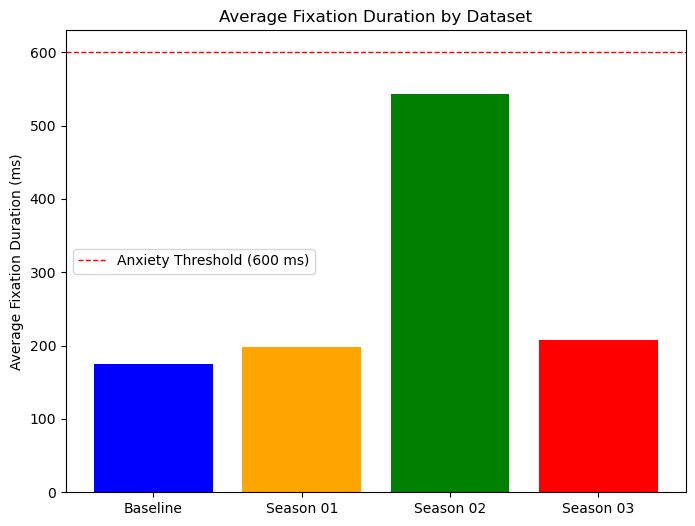

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/DM/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/DM/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/DM/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to calculate fixation durations
def calculate_fixation_durations(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations
    fixation_durations = fixation_durations[fixation_durations > 0]

    return fixation_durations

# Calculate fixation durations for each dataset
baseline_fixation_durations = calculate_fixation_durations(baseline_data)
season_01_fixation_durations = calculate_fixation_durations(season_01_data)
season_02_fixation_durations = calculate_fixation_durations(season_02_data)
season_03_fixation_durations = calculate_fixation_durations(season_03_data)

# Convert fixation durations to milliseconds
baseline_fixation_durations_ms = baseline_fixation_durations * 1000
season_01_fixation_durations_ms = season_01_fixation_durations * 1000
season_02_fixation_durations_ms = season_02_fixation_durations * 1000
season_03_fixation_durations_ms = season_03_fixation_durations * 1000

# Calculate the average fixation duration for each dataset
baseline_avg_fixation_duration_ms = baseline_fixation_durations_ms.mean()
season_01_avg_fixation_duration_ms = season_01_fixation_durations_ms.mean()
season_02_avg_fixation_duration_ms = season_02_fixation_durations_ms.mean()
season_03_avg_fixation_duration_ms = season_03_fixation_durations_ms.mean()

# Bar plot of average fixation durations
average_durations = [baseline_avg_fixation_duration_ms, season_01_avg_fixation_duration_ms, season_02_avg_fixation_duration_ms, season_03_avg_fixation_duration_ms]
labels = ['Baseline', 'Season 01', 'Season 02', 'Season 03']

plt.figure(figsize=(8, 6))
plt.bar(labels, average_durations, color=['blue', 'orange', 'green', 'red'])
plt.axhline(600, color='r', linestyle='dashed', linewidth=1, label='Anxiety Threshold (600 ms)')
plt.ylabel('Average Fixation Duration (ms)')
plt.title('Average Fixation Duration by Dataset')
plt.legend()
plt.show()

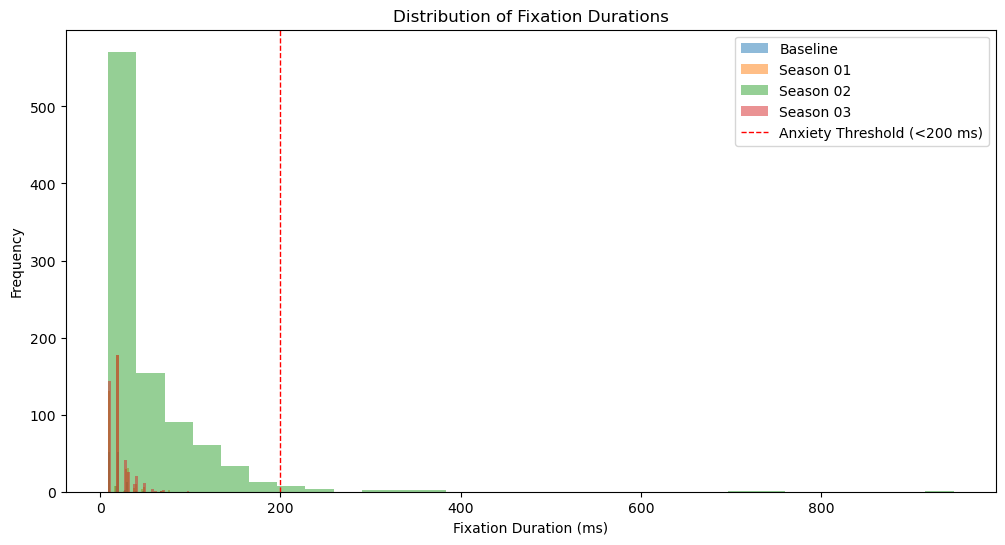

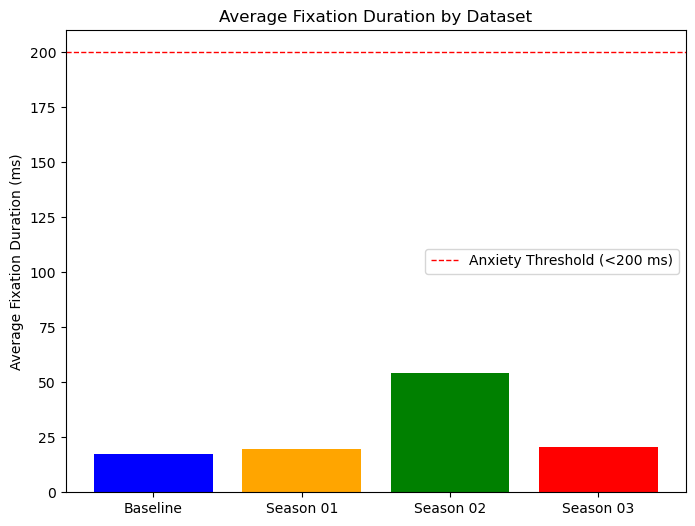

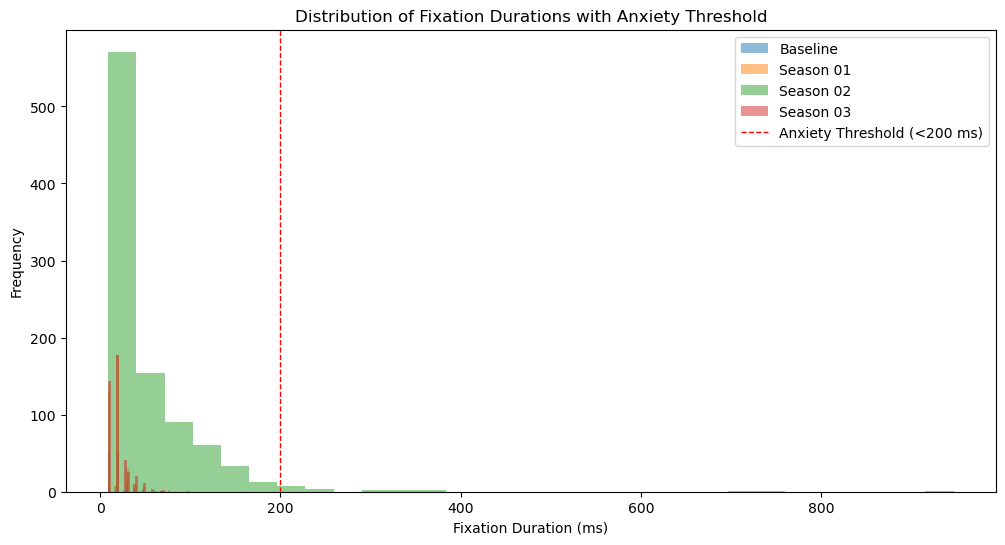

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/DM/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/DM/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/DM/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to calculate fixation durations
def calculate_fixation_durations(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations
    fixation_durations = fixation_durations[fixation_durations > 0]

    return fixation_durations

# Calculate fixation durations for each dataset
baseline_fixation_durations = calculate_fixation_durations(baseline_data)
season_01_fixation_durations = calculate_fixation_durations(season_01_data)
season_02_fixation_durations = calculate_fixation_durations(season_02_data)
season_03_fixation_durations = calculate_fixation_durations(season_03_data)

# Convert fixation durations to milliseconds
baseline_fixation_durations_ms = baseline_fixation_durations * 1000
season_01_fixation_durations_ms = season_01_fixation_durations * 1000
season_02_fixation_durations_ms = season_02_fixation_durations * 1000
season_03_fixation_durations_ms = season_03_fixation_durations * 1000

# Calculate the average fixation duration for each dataset
baseline_avg_fixation_duration_ms = baseline_fixation_durations_ms.mean()
season_01_avg_fixation_duration_ms = season_01_fixation_durations_ms.mean()
season_02_avg_fixation_duration_ms = season_02_fixation_durations_ms.mean()
season_03_avg_fixation_duration_ms = season_03_fixation_durations_ms.mean()

# Plot distribution of fixation durations
plt.figure(figsize=(12, 6))
plt.hist(baseline_fixation_durations_ms, bins=30, alpha=0.5, label='Baseline')
plt.hist(season_01_fixation_durations_ms, bins=30, alpha=0.5, label='Season 01')
plt.hist(season_02_fixation_durations_ms, bins=30, alpha=0.5, label='Season 02')
plt.hist(season_03_fixation_durations_ms, bins=30, alpha=0.5, label='Season 03')
plt.axvline(200, color='r', linestyle='dashed', linewidth=1, label='Anxiety Threshold (<200 ms)')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Fixation Durations')
plt.show()

# Bar plot of average fixation durations
average_durations = [baseline_avg_fixation_duration_ms, season_01_avg_fixation_duration_ms, season_02_avg_fixation_duration_ms, season_03_avg_fixation_duration_ms]
labels = ['Baseline', 'Season 01', 'Season 02', 'Season 03']

plt.figure(figsize=(8, 6))
plt.bar(labels, average_durations, color=['blue', 'orange', 'green', 'red'])
plt.axhline(200, color='r', linestyle='dashed', linewidth=1, label='Anxiety Threshold (<200 ms)')
plt.ylabel('Average Fixation Duration (ms)')
plt.title('Average Fixation Duration by Dataset')
plt.legend()
plt.show()

# Highlighting anxiety-indicating fixations
plt.figure(figsize=(12, 6))
plt.hist(baseline_fixation_durations_ms, bins=30, alpha=0.5, label='Baseline')
plt.hist(season_01_fixation_durations_ms, bins=30, alpha=0.5, label='Season 01')
plt.hist(season_02_fixation_durations_ms, bins=30, alpha=0.5, label='Season 02')
plt.hist(season_03_fixation_durations_ms, bins=30, alpha=0.5, label='Season 03')
plt.axvline(200, color='r', linestyle='dashed', linewidth=1, label='Anxiety Threshold (<200 ms)')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Fixation Durations with Anxiety Threshold')
plt.show()

Baseline Average Pupil Size: 2.26 mm - Normal
Season 1 Average Pupil Size: 1.96 mm - Normal
Difference from Baseline in Season 1: -0.30 mm
Season 2 Average Pupil Size: 2.24 mm - Normal
Difference from Baseline in Season 2: -0.02 mm
Season 3 Average Pupil Size: 2.78 mm - Normal
Difference from Baseline in Season 3: 0.52 mm


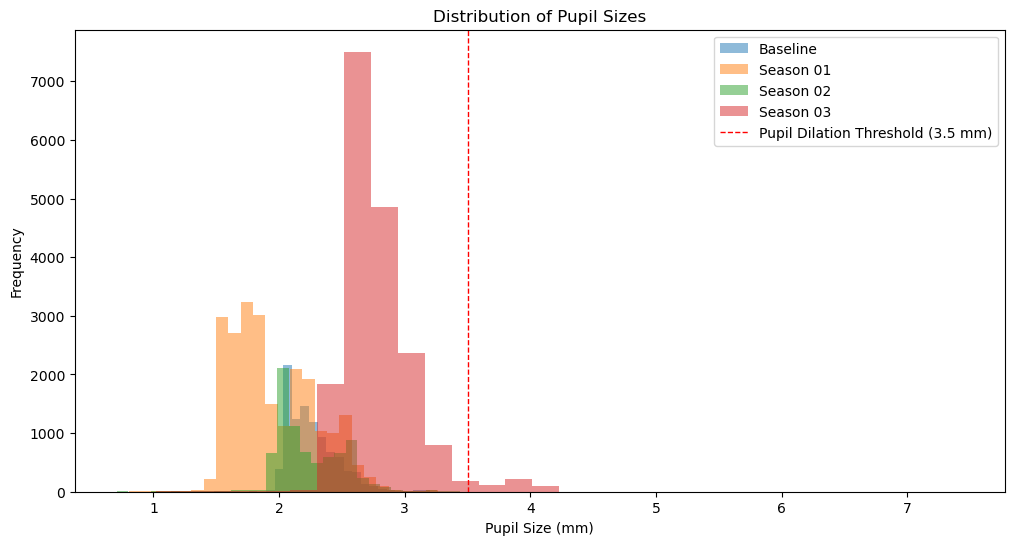

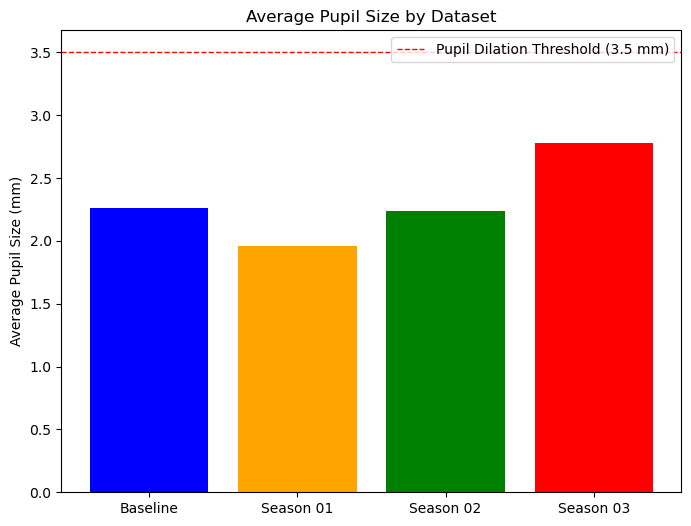

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/DM/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/DM/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/DM/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to clean pupil data
def clean_pupil_data(df):
    # Filter out rows where pupil size is invalid (e.g., zero or negative)
    df = df[df['pupil'] > 0]
    return df

# Clean the pupil data
baseline_data_clean = clean_pupil_data(baseline_data)
season_01_data_clean = clean_pupil_data(season_01_data)
season_02_data_clean = clean_pupil_data(season_02_data)
season_03_data_clean = clean_pupil_data(season_03_data)

# Calculate average pupil size for each dataset
baseline_avg_pupil_size = baseline_data_clean['pupil'].mean()
season_01_avg_pupil_size = season_01_data_clean['pupil'].mean()
season_02_avg_pupil_size = season_02_data_clean['pupil'].mean()
season_03_avg_pupil_size = season_03_data_clean['pupil'].mean()

# Define pupil dilation threshold (>3.5 mm)
pupil_dilation_threshold = 3.5

# Determine if the average pupil size for each dataset indicates increased pupil size
increased_pupil_baseline = baseline_avg_pupil_size > pupil_dilation_threshold
increased_pupil_01 = season_01_avg_pupil_size > pupil_dilation_threshold
increased_pupil_02 = season_02_avg_pupil_size > pupil_dilation_threshold
increased_pupil_03 = season_03_avg_pupil_size > pupil_dilation_threshold

# Display the results
print(f'Baseline Average Pupil Size: {baseline_avg_pupil_size:.2f} mm - {"Increased" if increased_pupil_baseline else "Normal"}')
print(f'Season 1 Average Pupil Size: {season_01_avg_pupil_size:.2f} mm - {"Increased" if increased_pupil_01 else "Normal"}')
print(f'Difference from Baseline in Season 1: {season_01_avg_pupil_size - baseline_avg_pupil_size:.2f} mm')
print(f'Season 2 Average Pupil Size: {season_02_avg_pupil_size:.2f} mm - {"Increased" if increased_pupil_02 else "Normal"}')
print(f'Difference from Baseline in Season 2: {season_02_avg_pupil_size - baseline_avg_pupil_size:.2f} mm')
print(f'Season 3 Average Pupil Size: {season_03_avg_pupil_size:.2f} mm - {"Increased" if increased_pupil_03 else "Normal"}')
print(f'Difference from Baseline in Season 3: {season_03_avg_pupil_size - baseline_avg_pupil_size:.2f} mm')

# Visualize the pupil size data
# Plot distribution of pupil sizes
plt.figure(figsize=(12, 6))
plt.hist(baseline_data_clean['pupil'], bins=30, alpha=0.5, label='Baseline')
plt.hist(season_01_data_clean['pupil'], bins=30, alpha=0.5, label='Season 01')
plt.hist(season_02_data_clean['pupil'], bins=30, alpha=0.5, label='Season 02')
plt.hist(season_03_data_clean['pupil'], bins=30, alpha=0.5, label='Season 03')
plt.axvline(pupil_dilation_threshold, color='r', linestyle='dashed', linewidth=1, label='Pupil Dilation Threshold (3.5 mm)')
plt.xlabel('Pupil Size (mm)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Pupil Sizes')
plt.show()

# Bar plot of average pupil sizes
average_pupil_sizes = [baseline_avg_pupil_size, season_01_avg_pupil_size, season_02_avg_pupil_size, season_03_avg_pupil_size]
labels = ['Baseline', 'Season 01', 'Season 02', 'Season 03']

plt.figure(figsize=(8, 6))
plt.bar(labels, average_pupil_sizes, color=['blue', 'orange', 'green', 'red'])
plt.axhline(pupil_dilation_threshold, color='r', linestyle='dashed', linewidth=1, label='Pupil Dilation Threshold (3.5 mm)')
plt.ylabel('Average Pupil Size (mm)')
plt.title('Average Pupil Size by Dataset')
plt.legend()
plt.show()

Baseline Saccade Frequency: 50.47 saccades/second - Increased
Season 1 Saccade Frequency: 49.95 saccades/second - Increased
Difference from Baseline in Season 1: -0.52 saccades/second
Season 2 Saccade Frequency: 43.52 saccades/second - Increased
Difference from Baseline in Season 2: -6.96 saccades/second
Season 3 Saccade Frequency: 48.35 saccades/second - Increased
Difference from Baseline in Season 3: -2.12 saccades/second


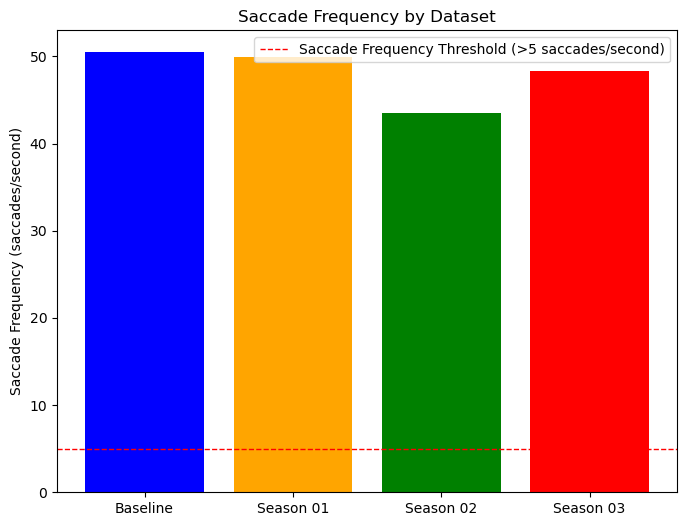

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/DM/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/DM/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/DM/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/DM/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to calculate saccade frequency
def calculate_saccade_frequency(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify saccades
    df['is_saccade'] = df['gaze_velocity'] > velocity_threshold

    # Count saccades per second
    total_time = df['reltime'].iloc[-1] - df['reltime'].iloc[0]
    saccade_count = df['is_saccade'].sum()
    saccade_frequency = saccade_count / total_time

    return saccade_frequency

# Calculate saccade frequency for each dataset
baseline_saccade_frequency = calculate_saccade_frequency(baseline_data)
season_01_saccade_frequency = calculate_saccade_frequency(season_01_data)
season_02_saccade_frequency = calculate_saccade_frequency(season_02_data)
season_03_saccade_frequency = calculate_saccade_frequency(season_03_data)

# Define saccade frequency threshold (>5 saccades/second)
saccade_frequency_threshold = 5

# Determine if the saccade frequency for each dataset indicates increased saccade frequency
increased_saccade_frequency_baseline = baseline_saccade_frequency > saccade_frequency_threshold
increased_saccade_frequency_01 = season_01_saccade_frequency > saccade_frequency_threshold
increased_saccade_frequency_02 = season_02_saccade_frequency > saccade_frequency_threshold
increased_saccade_frequency_03 = season_03_saccade_frequency > saccade_frequency_threshold

# Display the results
print(f'Baseline Saccade Frequency: {baseline_saccade_frequency:.2f} saccades/second - {"Increased" if increased_saccade_frequency_baseline else "Normal"}')
print(f'Season 1 Saccade Frequency: {season_01_saccade_frequency:.2f} saccades/second - {"Increased" if increased_saccade_frequency_01 else "Normal"}')
print(f'Difference from Baseline in Season 1: {season_01_saccade_frequency - baseline_saccade_frequency:.2f} saccades/second')
print(f'Season 2 Saccade Frequency: {season_02_saccade_frequency:.2f} saccades/second - {"Increased" if increased_saccade_frequency_02 else "Normal"}')
print(f'Difference from Baseline in Season 2: {season_02_saccade_frequency - baseline_saccade_frequency:.2f} saccades/second')
print(f'Season 3 Saccade Frequency: {season_03_saccade_frequency:.2f} saccades/second - {"Increased" if increased_saccade_frequency_03 else "Normal"}')
print(f'Difference from Baseline in Season 3: {season_03_saccade_frequency - baseline_saccade_frequency:.2f} saccades/second')

# Visualize the saccade frequency data
# Bar plot of saccade frequencies
saccade_frequencies = [baseline_saccade_frequency, season_01_saccade_frequency, season_02_saccade_frequency, season_03_saccade_frequency]
labels = ['Baseline', 'Season 01', 'Season 02', 'Season 03']

plt.figure(figsize=(8, 6))
plt.bar(labels, saccade_frequencies, color=['blue', 'orange', 'green', 'red'])
plt.axhline(saccade_frequency_threshold, color='r', linestyle='dashed', linewidth=1, label='Saccade Frequency Threshold (>5 saccades/second)')
plt.ylabel('Saccade Frequency (saccades/second)')
plt.title('Saccade Frequency by Dataset')
plt.legend()
plt.show()